**importing all the important libraries**

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Loading California Housing Prices DataSet

In [62]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

**Breifly analysing the dataset**

In [63]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [64]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [65]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preperation and Preprocessing of The Dataset

In [66]:
ds = pd.DataFrame(california.data, columns = california.feature_names)
ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Adding Price Column To The Dataset**

In [67]:
ds['Price'] = california.target
ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [69]:
## Summarizing The Stats of the data
ds.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [70]:
## Check the missing Values
ds.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [71]:
## Correlation between the variables
ds.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

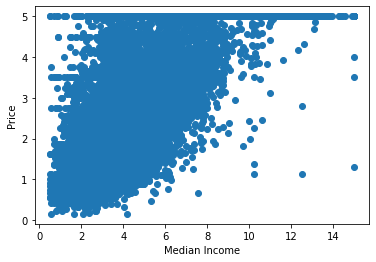

In [72]:
plt.scatter(ds['MedInc'], ds['Price'])
plt.xlabel('Median Income')
plt.ylabel('Price')

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

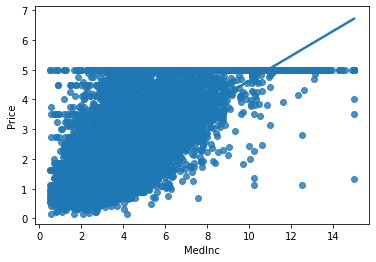

In [73]:
import seaborn as sns
sns.regplot(x = 'MedInc', y = 'Price', data = ds)

In [74]:
## splitting into dependent and independent features
x = ds.iloc[ : , : -1]
y = ds.iloc[ : , -1]

In [75]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [77]:
## splitting into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 29)

In [78]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14984,4.7679,11.0,6.390805,0.942529,441.0,2.534483,32.72,-116.99
17827,6.0959,3.0,5.530587,1.049938,2559.0,3.194757,37.37,-121.88
3499,5.1296,35.0,5.958491,1.132075,1012.0,3.818868,34.27,-118.45
3380,4.4485,35.0,6.414110,1.104294,879.0,2.696319,34.25,-118.27
3955,5.0025,32.0,5.932110,1.014679,1678.0,3.078899,34.20,-118.62
...,...,...,...,...,...,...,...,...
10601,7.7589,8.0,6.376900,1.039514,908.0,2.759878,33.67,-117.81
864,5.8322,14.0,5.689849,1.051282,8117.0,2.851071,37.57,-122.01
808,4.2468,32.0,5.624288,1.037951,1472.0,2.793169,37.62,-122.03
10749,13.1738,19.0,7.893733,1.125341,860.0,2.343324,33.61,-117.90


In [79]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16851,4.1513,17.0,2.567901,1.066667,669.0,1.651852,37.61,-122.42
11681,2.8169,29.0,4.266559,1.029079,2413.0,3.898223,33.84,-118.00
5996,3.5313,36.0,5.092409,0.980198,1355.0,4.471947,34.09,-117.73
4454,1.3125,37.0,3.250000,0.967391,318.0,3.456522,34.10,-118.17
9527,2.7750,31.0,5.160494,1.012346,327.0,4.037037,39.10,-123.16
...,...,...,...,...,...,...,...,...
13106,3.5625,14.0,5.769350,1.060372,1741.0,2.695046,38.41,-121.37
5094,3.3750,46.0,4.687500,1.042763,1140.0,3.750000,33.97,-118.30
10229,2.6563,36.0,3.072607,0.920792,778.0,2.567657,33.86,-117.93
14536,4.5086,16.0,5.715640,0.992891,1612.0,3.819905,32.93,-117.14


In [80]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [82]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [83]:
x_train

array([[ 0.48540386, -1.40626963,  0.44595538, ..., -0.0480363 ,
        -1.35801709,  1.28336156],
       [ 1.1917214 , -2.04153786,  0.05200038, ...,  0.00521245,
         0.81896415, -1.15606452],
       [ 0.67777965,  0.49953504,  0.247968  , ...,  0.05554484,
        -0.63235668,  0.55502576],
       ...,
       [ 0.20824868,  0.26130946,  0.09491304, ..., -0.02717418,
         0.93600615, -1.23089354],
       [ 4.95621306, -0.77100141,  1.13425332, ..., -0.06345256,
        -0.94134757,  0.82939883],
       [ 0.09746107,  1.84948002, -0.16643699, ..., -0.08724866,
        -0.67917348,  0.75955841]])

# Model Training

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression = LinearRegression()

In [86]:
regression.fit(x_train, y_train)

LinearRegression()

In [87]:
print(regression.coef_)

[ 0.84670238  0.12109942 -0.28353655  0.31639985 -0.00545288 -0.04119192
 -0.88950295 -0.86349661]


In [88]:
print(regression.intercept_)

2.065920457502769


In [89]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [90]:
## Prediction with test data
reg_pred = regression.predict(x_test)

In [91]:
## calculating residuals
residuals = y_test - reg_pred

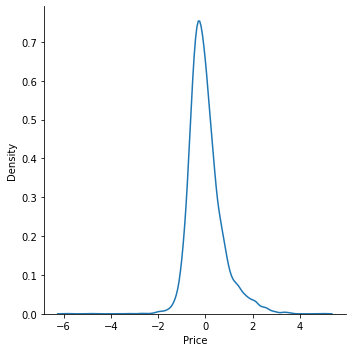

In [92]:
## plotting the residuals
sns.displot(residuals, kind = "kde")

In [93]:
## calculating mean square error, 
##             mean absolute error 
##         and root mean square error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.5080989918521248
0.517758026804431
0.7128106283243291


# R square and Adjusted R square
Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [94]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6184199057140779


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where: R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [95]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1]-1)

0.6179261905670155

# New Data Prediction

In [96]:
regression.predict(scaler.transform(california.data[0].reshape(1, -1)))

c:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.16851593])

# Pickling The Model For Deployment

In [97]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [98]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [99]:
## prediction
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

c:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.16851593])